<h1>Final Project <h1>



### Pair 24

####  Imports

In [1]:
# Install the pycountry-convert package
! pip install pycountry-convert


In [2]:
#imports
import time
import numpy as np
import pandas as pd
import seaborn as sns
import pycountry_convert as pc
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import auc, roc_auc_score, mean_squared_error, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

from scipy.interpolate import interp1d

%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

####  Measuring time

In [3]:
start_time = time.time()

## Part 1 - Exploration

In [4]:
#Open the train file on read mode & create a copy of the data
train_data = pd.read_csv("train.csv").copy()

#Open the test file on read mode & create a copy of the data
test_data = pd.read_csv("test.csv").copy()

train_data.head()

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0


From the provided data, the train data appears to contain various features and a corresponding label column.<br>
Each column represents a specific feature of a candidate applying for a job. <br>

Here are the descriptions of the columns: <br>

- **ID:** Unique identifier for each candidate. <br>
<br>
- **worked_in_the_past:** Indicates whether the candidate has work experience in the past (T/F). <br>
<br>
- **age_group:** Categorizes the age group of the candidate (young/ old). <br>
<br>
- **disability:** Indicates whether the candidate has any disabilities (Yes/No). <br>
<br>
- **is_dev:** Specifies if the candidate is a developer or non-developer.<br>
<br>
- **education:** The highest level of education attained by the candidate (e.g., BA/BSc, other). <br>
<br>
- **sex:** Gender of the candidate (Male, Female, Other). <br>
<br>
- **mental_issues:** Indicates if the candidate has any mental health issues (Yes/No). <br>
<br>
- **years_of_experience:** Total years of work experience the candidate has. <br>
<br>
- **country:** The country where the candidate is from. <br>
<br>
- **prev_salary:** The previous salary of the candidate. <br>
<br>
- **stack_experience:** list of technologies and tools the candidate has experience with. <br>
<br>
- **label:** The target variable indicating the hiring decision (1 for hired, 0 for not hired). <br>
<br>
- There are also 4 additional anonymous features (A, B, C, D) that could be useful for prediction, but their descriptions are not available.

#### Data Filteration & NULL check

In [5]:
#let's check the size of the data
print("The dimensions of the data:" ,train_data.shape,"\n")

# Check for null values in each feature
null_values = train_data.isnull().sum()

# Get the total number of observations (rows) in the train data
total_observations = train_data.shape[0]

# Calculate the percentage of null values for each column that has at least one null value
null_percentages = null_values[null_values > 0] / total_observations * 100

# Keep only the columns with null values
Total_nulls = null_values[null_values > 0]

# Present as a dataframe the total number of null values and their percentages
# Set the column names as "Total" and "Percentage"
display = pd.concat([null_values, null_percentages], axis=1, keys=["Total_nulls", "Percentage"])
display_sorted = display.sort_values(by="Total_nulls", ascending=False)
print(display_sorted)

The dimensions of the data: (55462, 17) 

                     Total_nulls  Percentage
stack_experience           14042   25.318236
disability                  3681    6.636977
B                           3535    6.373733
sex                         3228    5.820201
education                   3016    5.437958
C                           3002    5.412715
prev_salary                 2664    4.803289
D                           2619    4.722152
years_of_experience         2564    4.622985
age_group                   2540    4.579712
mental_issues               2415    4.354333
A                           2135    3.849483
is_dev                      2090    3.768346
country                     2019    3.640330
worked_in_the_past          1765    3.182359
ID                             0         NaN
label                          0         NaN


From the provided information about the DataFrame, we can infer some insights: <br>
1. The DataFrame contains **55,462 rows and 17 columns**, suggesting a relatively large dataset. <br>
2. **Missing Values:** Most of the columns have missing values. For data preprocessing and analysis, understanding and dealing with the missing data is crucial. We will do that later in the project.

In [6]:
#Filter candidates who were hired
hired_candidates = train_data[train_data['label'] == 1]
#Filter candidates who were not hired
not_hired = train_data[train_data['label'] == 0]

#Check how many candidates worked previously
print("Hired and Worked previously (True\False):")
worked_previously = hired_candidates["worked_in_the_past"].value_counts()
print(worked_previously, "\n")

#Check the descriptive statistics of neumeric valuse coulmns
print("Descriptive statistics of neumeric valuse coulmns:")
experience = hired_candidates["years_of_experience"].describe()
prev_salary = hired_candidates["prev_salary"].describe()
print("Years of experience - statistics:\n",experience)
print("\n")
print("Prev salary - statistics:\n",prev_salary)
print("\n")

print("Age distribution:")
age_accepted = hired_candidates["age_group"].value_counts()
print(age_accepted)
print("\n")

# Count accepted candidates by gender
gender_counts = hired_candidates["sex"].value_counts()
print("Gender Distribution:\n", gender_counts, "\n")

#Country Distribution
country_distribution = hired_candidates["country"].value_counts()
print("Country Distribution:\n", country_distribution, "\n")

#Stack experience text, check for unique
Stack = hired_candidates["stack_experience"].unique()
print(Stack)

Hired and Worked previously (True\False):
T    25288
F     3492
Name: worked_in_the_past, dtype: int64 

Descriptive statistics of neumeric valuse coulmns:
Years of experience - statistics:
 count    28369.000000
mean        14.178822
std          9.056156
min          0.000000
25%          7.000000
50%         12.000000
75%         20.000000
max         50.000000
Name: years_of_experience, dtype: float64


Prev salary - statistics:
 count     28291.000000
mean      67821.147432
std       49653.452590
min           1.000000
25%       28627.000000
50%       57588.000000
75%       96500.000000
max      224000.000000
Name: prev_salary, dtype: float64


Age distribution:
young    18874
old       9482
Name: age_group, dtype: int64


Gender Distribution:
 Male      26384
Female     1118
Other       520
Name: sex, dtype: int64 

Country Distribution:
 United States of America                                5877
Germany                                                 2076
India                

### Statistics Summary

In [7]:
print(train_data.describe().transpose())

                       count          mean           std         min  \
ID                   55462.0  36709.781292  21205.952730    0.000000   
years_of_experience  52898.0     14.214847      9.391586    0.000000   
A                    53327.0      4.003959      6.392311  -21.637116   
B                    51927.0      9.079612      7.965858    0.000000   
D                    52843.0    179.580295      1.094272  175.077992   
prev_salary          52798.0  67800.074662  49583.999657    1.000000   
label                55462.0      0.536223      0.498691    0.000000   

                              25%           50%           75%            max  
ID                   18388.250000  36699.500000  55049.750000   73461.000000  
years_of_experience      7.000000     12.000000     20.000000      50.000000  
A                       -0.362863      3.606089      7.852744      55.495063  
B                        3.000000      7.000000     12.000000      50.000000  
D                      178.8

The information provided represents the discriptive statistics for each numerical feature.

### Duplicates

In [8]:
# Check for duplicates and keep the first instance
duplicates_index = train_data[train_data.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

Since each sample possesses a unique id, we can infer that there are no duplicates within the data. Nevertheless, we will examine for similar rows, excluding the identifier.

In [9]:
# Check for duplicates and keep the first instance
duplicates_index_no_id = train_data[train_data.iloc[:,1:].duplicated(keep="first")].index
duplicates_index_no_id.shape

(0,)

We can deduce that there aren't  samples that share identical features and labels. This means that duplication will not cause any problems 

### Numerical Features Distribution

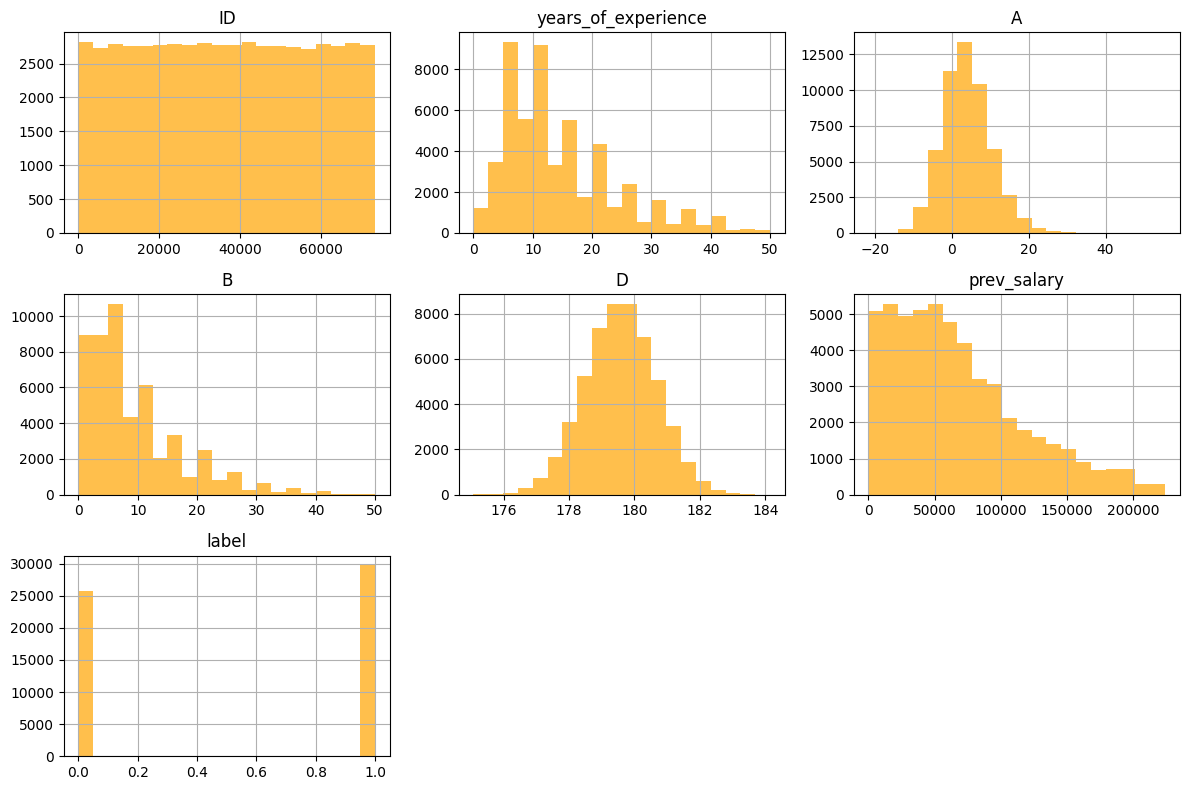

In [10]:
# Create a figure with adjusted size and spacing
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Distribution of Features", fontsize=16)
ax.set_xlabel("Values", fontsize=12)
ax.set_ylabel("Frequency (log scale)", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Create the histogram
train_data.hist(bins=20, ax=ax,  color='orange', alpha=0.7)

# Set logarithmic scale on the y-axis
ax.set_yscale('log')

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Analysis of numeric features:<br>

• **Years of experience:** The distribution is skewed to the left, indicating that most candidates have relatively few years of experience.<br>
• **A:** This feature has a normal distribution in value centered around a positive value, with some negative values. The meaning of this feature is unclear from the dataset.<br>
• **B:** This feature is skewed to the left. Most candidates have lower values, and fewer candidates have higher values.<br>
• **D:** This feature has a normal distribution, centered around a specific value (179.580295).<br>
• **Prev_salary:** The distribution is heavily skewed to the left, indicating that most applicants have lower prior salaries, with a long tail of applicants with very high prior salaries.<br>

### Correlation between numerical features

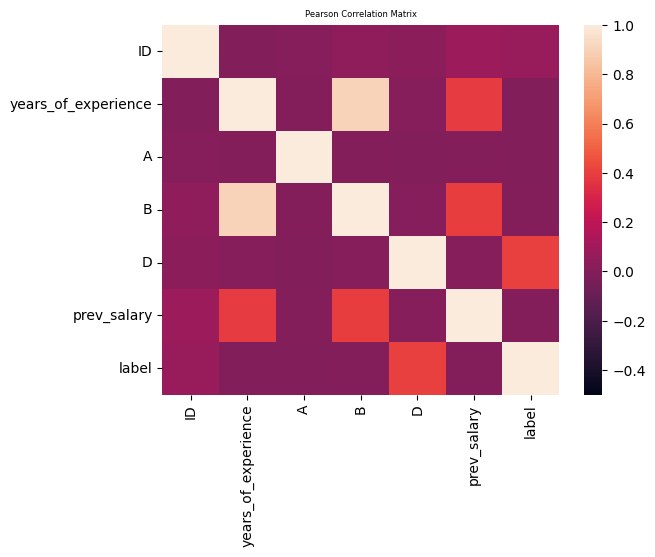

                           ID  years_of_experience         A         B  \
ID                   1.000000            -0.002762  0.004098  0.041996   
years_of_experience -0.002762             1.000000  0.000267  0.900905   
A                    0.004098             0.000267  1.000000  0.002410   
B                    0.041996             0.900905  0.002410  1.000000   
D                    0.025494             0.008005 -0.004881  0.009165   
prev_salary          0.080828             0.389931  0.000214  0.391391   
label                0.069787            -0.004125 -0.004518  0.002492   

                            D  prev_salary     label  
ID                   0.025494     0.080828  0.069787  
years_of_experience  0.008005     0.389931 -0.004125  
A                   -0.004881     0.000214 -0.004518  
B                    0.009165     0.391391  0.002492  
D                    1.000000     0.005981  0.406377  
prev_salary          0.005981     1.000000  0.000457  
label                0

In [11]:
# Create the correlation matrix
corr_matrix_pear = train_data.corr(method = 'pearson')
fig, ax = plt.subplots()
sns.heatmap(data=corr_matrix_pear, annot=False, ax=ax, vmin=-0.5, vmax=1)
ax.set_title("Pearson Correlation Matrix", fontsize=6)
ax.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=90)
plt.show()

# Display the correlation values in a separate table
corr_table_pear = pd.DataFrame(data=corr_matrix_pear.values, index=corr_matrix_pear.index, columns=corr_matrix_pear.columns)
print(corr_table_pear)

From the correlation matrix provided, we can learn about the relationships between different numerical features in the dataset:<br>

Most of the numerical feature show weak correlations (close to 0).<br>

**Positive Correlations:**<br>

“B” and “Years_of_experience” have a high positive correlation of 0.900905.<br>
“Label” and “D” show a positive correlation of 0.406377<br>
“prev_salary” and “Years_of_experience” have a positive correlation of 0.389931.<br>
“prev_salary” and "B" have a positive correlation of 0.391391.<br>

**Negative Correlations:**<br>

Example of a negative correlation is "years_of_experience" and “label” , which shows a negative correlation of -0.04125, suggesting a weak relationship between years of experience and the label (0 or 1).<br>

### Exploring categorical features 

In [12]:
unique_values = train_data.nunique()
unique_values

# Iterate through each column and print the unique values
for column in train_data.columns:
    unique_vals = train_data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_vals}")
    print("\n")

Column: ID
Unique Values: [65168 38314  5209 ... 47358 36055 40806]


Column: worked_in_the_past
Unique Values: ['T' 'F' nan]


Column: age_group
Unique Values: ['young' 'old' nan]


Column: disability
Unique Values: ['No' nan 'Yes']


Column: is_dev
Unique Values: ['developer' 'non-developer' nan]


Column: education
Unique Values: [nan 'other' 'BA/BSc' 'MA/MSc' 'High school' 'Phd']


Column: sex
Unique Values: ['Male' 'Female' nan 'Other']


Column: mental_issues
Unique Values: ['No' 'Yes' nan]


Column: years_of_experience
Unique Values: [13.  7. 25. 10. 12. 40. 46. 41. 34. 23.  5.  2. 22. 14. 32. 11. 37.  9.
 17. 18.  4. 30.  3. 19. 20. 24. 16.  6. 35. 42. 15. nan 21. 28. 27. 36.
  8.  1. 45. 26. 31. 50. 43. 33. 44. 38.  0. 39. 29. 48. 47. 49.]


Column: A
Unique Values: [-1.09308011  5.44453301  1.72725498 ...  1.47301497 -0.88330503
 -4.04122302]


Column: B
Unique Values: [ 1.  7. 15.  4. 25.  2. nan 19. 17.  9. 32.  6.  0. 14.  3. 20. 16. 10.
 12.  5. 22. 11. 23. 30. 31. 13. 21

### Visuallizations

**Distribution of Education Levels among Hired and Non hired Candidates**

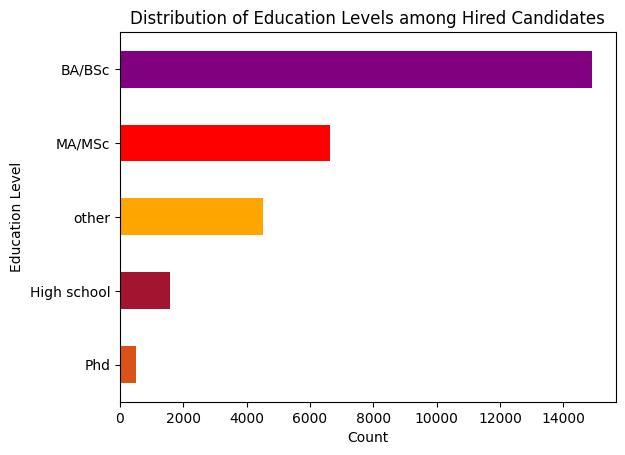

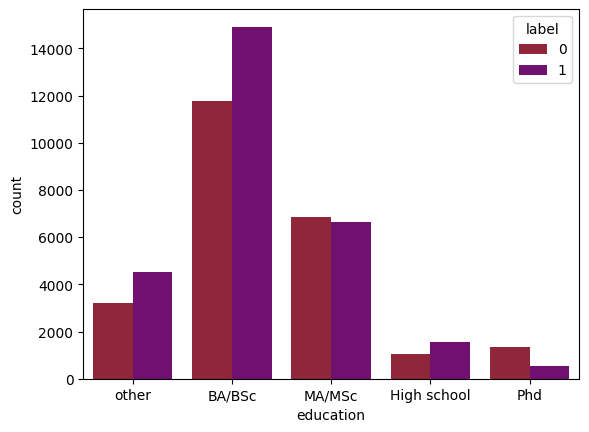

In [13]:
Categorical_Education = hired_candidates["education"].value_counts().sort_values(ascending=True).plot(kind='barh', color=["#D95319", "#A2142F", "orange","red", "purple"])
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Distribution of Education Levels among Hired Candidates')
plt.show()

plt.figure()
education_plt = sns.countplot(x = 'education',hue='label', data=train_data, palette=["#A2142F","purple"])
plt.show()

- **Insights:** <br>
The most common education level among hired candidates is a BA/BSc.<br>
However, the plots show that most job applicants also have a BA/BSc. Thus, while a BA/BSc is prevalent among hired candidates, it is also the most common degree among applicants.

**Distribution of Top 20 Stack Experiences by Hiring Status**

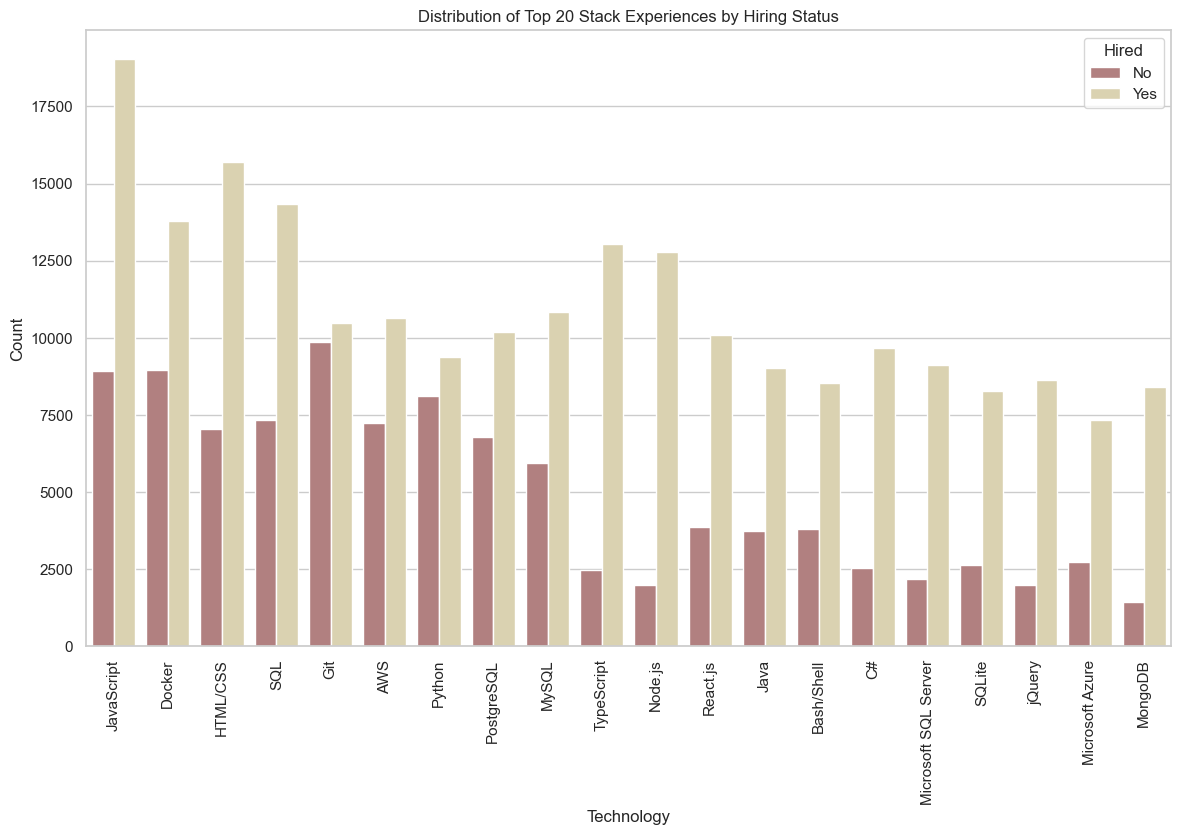

In [14]:
# Assuming train_data is already available and preprocessed
# Split stack_experience into individual technologies
stack_expanded = train_data['stack_experience'].str.split(';').explode().reset_index()

# Merge with the original data to retain labels
stack_expanded = stack_expanded.merge(train_data[['label']], left_on='index', right_index=True)

# Count the occurrences of each stack experience by label
stack_experience_counts = stack_expanded.groupby(['stack_experience', 'label']).size().unstack(fill_value=0)

# Sort by total count and select the top 20 stack experiences
top_20_stack_experience = stack_experience_counts.sum(axis=1).nlargest(20).index
top_20_stack_experience_counts = stack_experience_counts.loc[top_20_stack_experience]

# Create a DataFrame suitable for plotting
top_20_stack_experience_counts = top_20_stack_experience_counts.reset_index().melt(id_vars='stack_experience', value_vars=[0, 1], var_name='Hired', value_name='Count')
top_20_stack_experience_counts['Hired'] = top_20_stack_experience_counts['Hired'].map({0: 'No', 1: 'Yes'})

# Plot the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='stack_experience', y='Count', hue='Hired', data=top_20_stack_experience_counts, palette='pink')
plt.title('Distribution of Top 20 Stack Experiences by Hiring Status')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.legend(title='Hired', loc='upper right')
plt.xticks(rotation=90)
plt.show()

- **Insights** : <br>
From the graph, we can make the following observations:<br>

    Most Common Technologies:<br>
    JavaScript: The most common technology among hired candidates.<br>
    Docker, HTML/CSS, SQL: These technologies also have high counts for both categories.<br>

    Hiring Preference:<br>
    Technologies like JavaScript,Docker, HTML/CSS, SQL, TypeScript and Node.js are prevalent among hired candidates, indicating a preference for candidates proficient in these technologies.

    We can observe that most candidates proficient in Node.js and TypeScript are more likely to be hired compared to those who are not hired. This indicates that these technologies are highly valued and preferred by employers in the hiring process.

**Distribution of Hired and Not Hired Candidates by Continent**

We chose to use the library - **pycountry-convert**<br>
pycountry-convert is a Python library that facilitates the conversion between different geographical naming conventions.<br>
It provides functionalities to convert country names to different codes (such as ISO alpha-2 and alpha-3), and also to convert country codes to continent codes and continent names. <br>
<br>
By incorporating pycountry-convert into our data processing pipeline, we aim to see if geographical location has any influence on the hiring outcomes.<br>
<br>
refer to the official documentation: https://pypi.org/project/pycountry-convert/ 

<Figure size 1000x600 with 0 Axes>

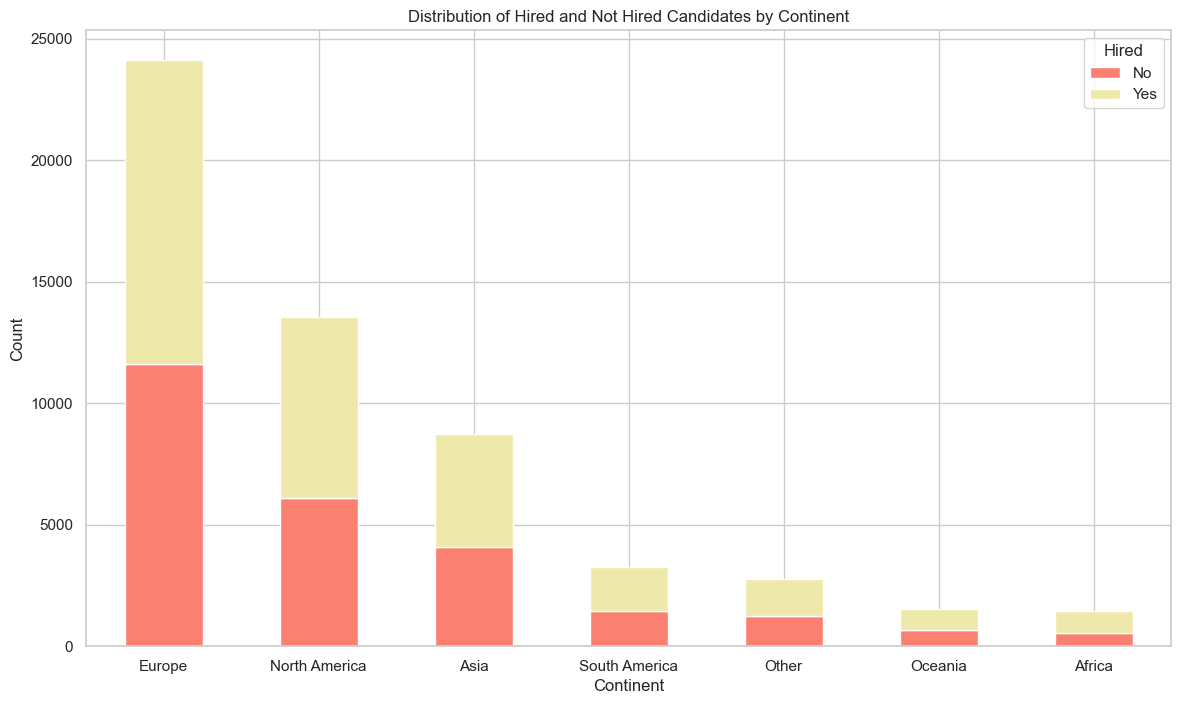

In [15]:
train_data_temp = train_data.copy()

def country_to_alpha2(country_name):
    if pd.isna(country_name):
        return None
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        return country_alpha2
    except KeyError:
        return None

def alpha2_to_continent(alpha2):
    if pd.isna(alpha2):
        return None
    try:
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return continent_code
    except KeyError:
        return None

def add_continent_feature(data):
    """
    Function to add continent feature to the dataset based on the country feature.
    """
    data['country_alpha2'] = data['country'].apply(lambda x: country_to_alpha2(str(x)))
    data['continent_code'] = data['country_alpha2'].apply(alpha2_to_continent)

    continent_mapping = {
        'NA': 'North America',
        'EU': 'Europe',
        'AS': 'Asia',
        'OC': 'Oceania',
        'SA': 'South America',
        'AF': 'Africa'
    }
    
    data['continent'] = data['continent_code'].map(continent_mapping).fillna('Other')
    return data

def plot_continent_distribution(data):
    """
    Function to plot the distribution of hired and not hired candidates by continent.
    """
    # Calculate the count of hired and not hired candidates for each continent
    continent_counts = data.groupby(['continent', 'label']).size().unstack(fill_value=0)

    # Sort the DataFrame by the total number of candidates for each continent
    continent_counts['Total'] = continent_counts.sum(axis=1)
    continent_counts = continent_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

    # Plot the distribution of hired and not hired candidates for each continent
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    continent_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['salmon', 'palegoldenrod'])
    plt.title('Distribution of Hired and Not Hired Candidates by Continent')
    plt.xlabel('Continent')
    plt.ylabel('Count')
    plt.legend(title='Hired', loc='upper right', labels=['No', 'Yes'])
    plt.xticks(rotation=0)
    plt.show()

# Apply the add_continent_feature function to the training data
train_data_temp = add_continent_feature(train_data_temp)

# Plot the continent distribution
plot_continent_distribution(train_data_temp)

**Insights:** <br>
This graph shows the distribution of hired and not hired candidates across different continents.<br>
It is suggesting that Europe and North America are the primary sources of talent, followed by Asia.<br>
Given the similar proportions of hired and not hired candidates across continents, it can be inferred that the continent of origin may not be a significant factor in the hiring decision.<br>
We will later on analyse the contibution of this division to understand if it is helpfull for the model performences.

## Part 2 - Preprocessing

### Handling categorical features 

Given that many of the features in our dataset are categorical, we will now focus on extracting more information from these features to improve our model. <br>
Specifically, we will convert catagorical features to numeric values (0 and 1), transform the country feature into continents, <br>
and split the technology feature to gain insights into technologies and hiring candidates.<br>
By doing so, we aim to enhance the model's performance and derive more meaningful insights from the data.

We will preprocess the data by encoding categorical features and then dropping the original categorical columns. This approach helps prevent any issues with data types and ensures that the models use only numerical features.

In [16]:
def encode_and_add_features(data):
    # Apply LabelEncoder to 'is_dev' feature
    data['is_dev_encoded'] = data['is_dev'].apply(lambda x: 1 if x == 'developer' else 0)
    
    # Apply LabelEncoder to 'education' feature
    education_mapping = {'BA/BSc': 1, 'High school': 2, 'MA/MSc': 3, 'other': 4, 'Phd': 5}
    data['education_encoded'] = data['education'].apply(lambda x: education_mapping.get(x, 0))
    
    # Apply LabelEncoder to 'sex' feature
    sex_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
    data['sex_encoded'] = data['sex'].apply(lambda x: sex_mapping.get(x, 0))
    
    # Apply LabelEncoder to 'mental_issues' feature
    data['mental_issues_encoded'] = data['mental_issues'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Apply LabelEncoder to 'disability' feature
    data['disability_encoded'] = data['disability'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Apply LabelEncoder to 'age_group' feature
    data['age_group_encoded'] = data['age_group'].apply(lambda x: 1 if x == 'old' else 0)
    
    # Apply LabelEncoder to 'worked_in_the_past' feature
    data['worked_in_the_past_encoded'] = data['worked_in_the_past'].apply(lambda x: 1 if x == 'T' else 0)
    
    # Apply LabelEncoder to 'C' feature
    c_mapping = { 'aa': 1, 'br': 2, 'ca': 3, 'hr': 4, 'mn': 5, 'rhz': 6, 'ww': 7}
    data['C_encoded'] = data['C'].apply(lambda x: c_mapping.get(x, 0))
    
   # Create a new feature to asses the len of technologies
   # One-hot encode the 'stack_experience' feature
    data['stack_experience'] = data['stack_experience'].astype(str).fillna('')
    stack_list = data['stack_experience'].str.split(';')
    unique_technologies = set(tech for sublist in stack_list for tech in sublist)
    
    for tech in unique_technologies:
        data[tech] = data['stack_experience'].apply(lambda x: 1 if tech in x.split(';') else 0)

    # Function to create a new feature to asses the countries
    # convert country name to ISO Alpha-2 code
    def country_to_alpha2(country_name):
        if pd.isna(country_name):
            return None
        try:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
            return country_alpha2
        except KeyError:
            return None

    # Function to convert ISO Alpha-2 code to continent code
    def alpha2_to_continent(alpha2):
        if pd.isna(alpha2):
            return None
        try:
            continent_code = pc.country_alpha2_to_continent_code(alpha2)
            return continent_code
        except KeyError:
            return None
        
    # Apply the functions to the 'country' column
    data['country_alpha2'] = data['country'].apply(lambda x: country_to_alpha2(str(x)))
    data['continent_code'] = data['country_alpha2'].apply(alpha2_to_continent)

    continent_mapping = {
        'NA': 1,  # North America
        'EU': 2,  # Europe
        'AS': 3,  # Asia
        'OC': 4,  # Oceania
        'SA': 5,  # South America
        'AF': 6   # Africa
    }
    data['continent_number'] = data['continent_code'].map(continent_mapping).fillna(7).astype(int)    
    return data

In [17]:
train_data = encode_and_add_features(train_data)

In [18]:
def drop_non_relevant_features(data):
    columns_to_drop = ['ID','is_dev', 'education', 'sex', 'mental_issues', 'disability', 'age_group', 'worked_in_the_past', 'A','C', 'stack_experience', 'country', 'country_alpha2', 'continent_code', 'nan']
    data = data.drop(columns=columns_to_drop)
    return data

In [19]:
train_data = drop_non_relevant_features(train_data)

- Based on the correlation matrix analysis, it is evident that variable 'A' has the weakest correlation with the label. Therefore, we will remove it from the dataset.<br>
- We are removing the ID feature because each ID has its own unique value, and it does not provide any useful information for the prediction process.<br>
- We created the continent_num feature from the country, continent code, and ISO Alpha-2 country code columns. After extracting this useful numerical representation, we will drop those columns.<br>
- When we handled the stack experience feature, we created a column for each programming language, since part of the rows are empty it also created a feature for nan values.
Since candidates who do not list any technology will have 0 in all technology columns according to our definition, keeping the "nan" column does not add value, so we chose to remove it.<br>
- In addition, we will drop columns that we encoded from categorical to numeric.<br>

### Handeling NULL Values

We reviewed the data and noticed a significant number of missing values as indicated above. We will now address these gaps using several different approaches.

In [20]:
# Function to handle missing values
def handle_missing_values(data):
    # Replacing with median values - Using the median ensures the imputed values stay within the existing range of data, maintaining the original distribution.
    data['D'] = data['D'].fillna(data['D'].median())
    data['B'] = data['B'].fillna(data['B'].median())
    data['years_of_experience'] = data['years_of_experience'].fillna(data['years_of_experience'].median())
    data['prev_salary'] = data['prev_salary'].fillna(data['prev_salary'].median())

    # Replacing with the most common value
    data['worked_in_the_past_encoded'] = data['worked_in_the_past_encoded'].fillna("1")
    data['disability_encoded'] = data['disability_encoded'].fillna("0")
    data['is_dev_encoded'] = data['is_dev_encoded'].fillna("1")
    data['mental_issues_encoded'] = data['mental_issues_encoded'].fillna("0")
    
    data['continent_number'] = data['continent_number'].replace(7, 2)
    
    # We fill the missing values with "other" because it avoids introducing bias by assuming a specific education level for missing data
    data['education_encoded'] = data['education_encoded'].replace(0, 4)
    
    # To avoid making strong assumptions about all missing values being men, we filled the missing values with "other"
    data['sex_encoded'] = data['sex_encoded'].replace(0, 3)
    
    return data

1. **Numerical Features**:
    - **D, B, Years of Experience, Previous Salary**:
 We replaced missing values with the median. Using the median ensures that the imputed values stay within the existing range of data, maintaining the original distribution and reducing the risk of skewing the data.

2. **Categorical Features**:
    - **Worked in the Past, Disability, Is Developer, Mental Issues**:
We replaced missing values with the most common value. This method is appropriate for binary or categorical data as it preserves the majority class, ensuring that the imputed values do not introduce significant bias.

3. **Special Cases**:
    - **Continent Number**:
 We replaced the value 7 with 2 (Europe).Europe had a significant number of candidates, making it a reasonable default.

4. **Education**:
 We filled missing values with the code for 'other' (4). Using 'other' avoids introducing bias by assuming a specific education level for missing data.

5. **Sex**:
We filled missing values with 'other' (3).This approach avoids making strong assumptions about the missing values being male or female.


In [21]:
train_data = handle_missing_values(train_data)

#Check that there are no empty cells
print(train_data.isnull().sum())

print(train_data.shape)

years_of_experience    0
B                      0
D                      0
prev_salary            0
label                  0
                      ..
Deno                   0
Solidity               0
MySQL                  0
Google Cloud           0
continent_number       0
Length: 129, dtype: int64
(55462, 129)


### Finding outliers in the data

Box plots are useful because they visually display the distribution of the data and clearly mark outliers. <br>
Any point outside this range is considered as an outlier. 

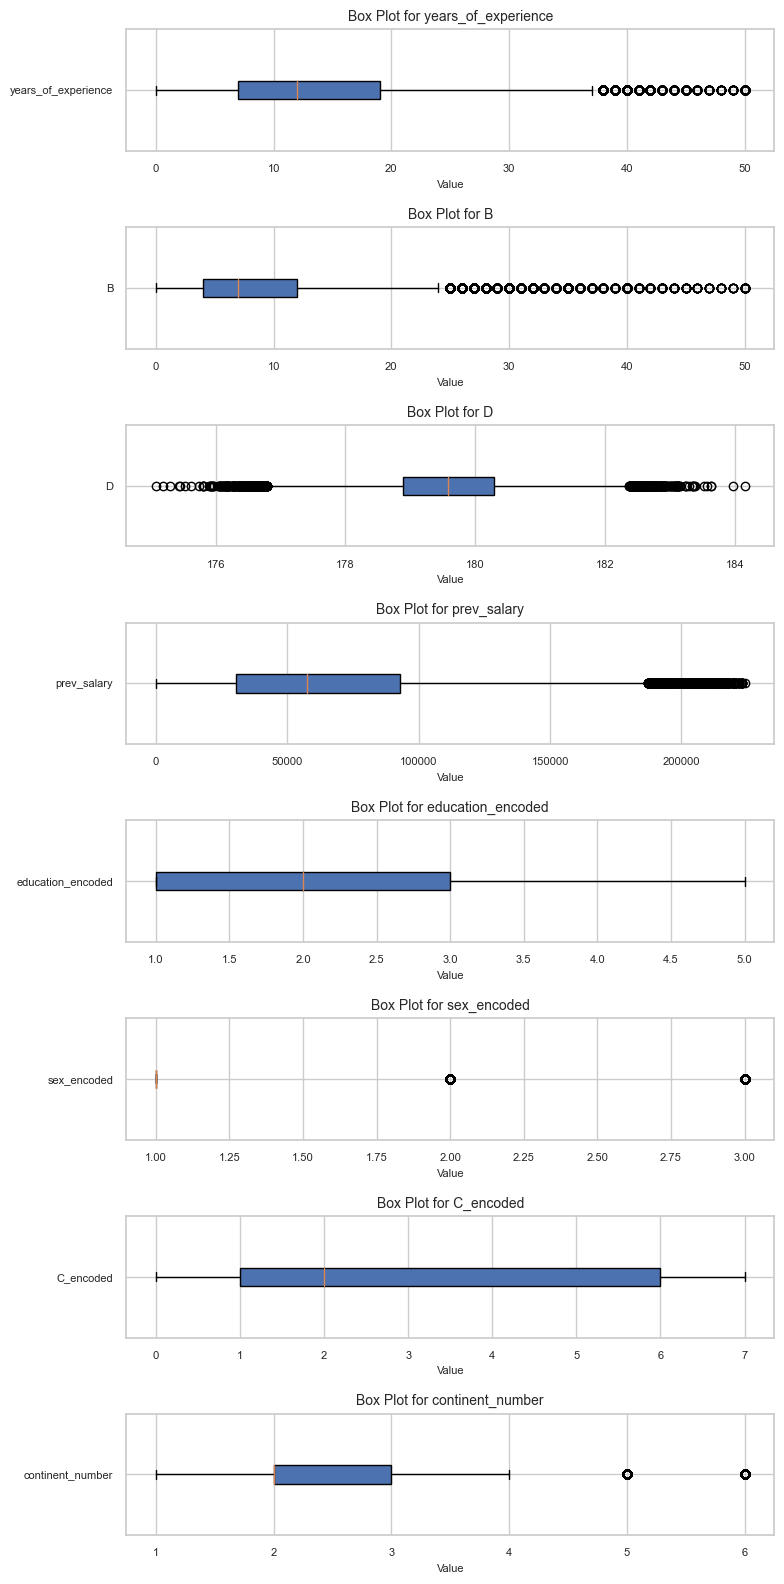

In [22]:
def plot_boxplots(data):
    # Create a list of numeric columns excluding binary columns
    numeric_cols = [col for col in data.columns if data[col].dtype != 'object' and data[col].nunique() > 2]

    # Calculate the number of rows and columns for the subplots
    num_rows = len(numeric_cols) # determines how many rows of subplots will be created
    num_cols = 1 # one subplot per row

    # Adjust the figure size based on the number of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, num_rows * 2), squeeze=False)

    # Iterate over the numeric columns and create a boxplot for each
    for i, col in enumerate(numeric_cols):
        axs[i, 0].boxplot(data[col].dropna(), vert=False, patch_artist=True)
        axs[i, 0].set_title(f'Box Plot for {col}', fontsize=10)
        axs[i, 0].set_xlabel('Value', fontsize=8)
        axs[i, 0].set_yticklabels([col], fontsize=8)
        axs[i, 0].tick_params(axis='x', labelsize=8)
        axs[i, 0].tick_params(axis='y', labelsize=8)
        
    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

# Apply the plot_boxplots function to the training data
plot_boxplots(train_data)

### Analysis of the Box Plots <br>

**Years of Experience:** The plot shows several outliers beyond 30 years of experience. The majority of candidates have less than 20 years of experience, with a median of 12. <br>
**Feature A:** centered around zero with a lot of outliers on both the lower and upper ends. This feature may benefit from scaling or transformation to reduce the impact of outliers. <br>
**Feature B:** shows a right-skewed distribution with many values between 0 and 20. Significant outliers are present beyond 30. <br>
**Feature D:** The plot indicates several outliers at both the lower and upper ends of the distribution. <br>
**Continent Number:** Shows candidates from different continents, with some outliers indicating less common regions. <br>
**Other Encoded Features:** Binary features, inherently do not have outliers in the traditional sense, as their values are limited to 0 and 1. For these features, the outliers should be considered normal values.

Depending on the results of the first model attempt, we will decide whether to remove outliers or normalize them.

### Normalize


The data isn't normalized across all features. There are some features that we want to normalize.
We will normalize the data for a few reasons: <br>
1. Equalizes the Scales of Different Features: Feature scales can be vastly different within the dataset. By normalizing these features, we prevent features with larger values from dominating the learning process. <br>
2. Avoids Bias: Normalization ensures that each feature contributes proportionally to the learning process, avoiding bias towards features with larger ranges. <br>
3. Accelerates Convergence of Optimization Algorithms: Normalized data typically leads to a more stable and efficient optimization process, resulting in faster model training. <br>
4. Improves Model Performance: By reducing the impact of different scales and biases, normalization leads to more accurate predictions. <br>

• For features with many outliers, **Robust Scaler** is generally considered the most appropriate normalization technique. The Robust Scaler uses the median and the interquartile range (IQR) for scaling.<br>

• **Min-Max** scaling was applied to D to transform this feature into a fixed range, typically [0, 1]. <br>
  This method is useful when you want to ensure that all feature values are within the same range, making them easier to compare and preventing any feature from dominating the model due to its larger scale.<br>
 
 (taken from: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) 
  

In [23]:
def normalize_robust(data, columns):
    # Create a RobustScaler object
    scaler = RobustScaler()

    # Fit the scaler to the specified columns and transform the data
    normalized_data = scaler.fit_transform(data[columns])

    # Create a copy of the original DataFrame
    normalized_df = data.copy()

    # Assign the normalized values to the specified columns in the DataFrame
    normalized_df[columns] = normalized_data

    return normalized_df


def normalize_minmax(data, columns):
    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit the scaler to the specified columns and transform the data
    normalized_data = scaler.fit_transform(data[columns])

    # Create a copy of the original DataFrame
    normalized_df = data.copy()

    # Assign the normalized values to the specified columns in the DataFrame
    normalized_df[columns] = normalized_data

    return normalized_df

# Specify the columns to normalize
columns_to_normalize_robust = ['years_of_experience', 'B', 'prev_salary']
columns_to_normalize_minmax = ['D']

# Normalize using Z-score normalization
normalized_df_robust = normalize_robust(train_data, columns_to_normalize_robust)
# Normalize using Min-Max normalization
normalized_df_minmax = normalize_minmax(train_data, columns_to_normalize_minmax)

train_data = normalize_robust(train_data, ['years_of_experience', 'B', 'prev_salary'])
train_data = normalize_minmax(train_data, ['D'])

- Later on, we observed a significant decrease in the AUC scores without normalization, so we decided to normalize the data.

### Splitting the data

To ensure the integrity and reliability of our model evaluation, we split the dataset into training and validation. <br>
This approach allows us to train the model on one set of data, tune hyperparameters and select the best model using a separate validation set, and finally evaluate the model’s performance on a distinct test set. <br>
By keeping these sets separate, we can more accurately assess how the model will perform on new, unseen data, thus preventing overfitting and ensuring a more reliable and generalizable model.<br>

In [24]:
def x_y_split(data, size):
    # Splitting the data into features matrix (X) and label (y)
    X = data.drop(columns=['label'])
    y = data['label']
    
    #spliting the data to train and validation
    X_train ,X_validation ,y_train, y_validation = train_test_split(X,y,test_size = size, random_state= 42, shuffle=True)
    print(f'X_train.shape: {X_train.shape}\n y_train.shape: {y_train.shape}\n X_validation.shape: {X_validation.shape}\n y_validation.shape: {y_validation.shape}\n')
    return X, y, X_train ,X_validation ,y_train, y_validation

X, y, X_train ,X_validation ,y_train, y_validation = x_y_split(train_data, 0.2)

X_train.shape: (44369, 128)
 y_train.shape: (44369,)
 X_validation.shape: (11093, 128)
 y_validation.shape: (11093,)



### Dimensional Reduction

High-dimensional data can lead to overfitting, increased computational demands, and difficulty in identifying patterns. These challenges complicate data analysis and interpretation. <br>
To simplify the data and maintain essential information, we will use Principal Component Analysis (PCA) to reduce the number of dimensions.

When the number of features (columns) is comparable to or greater than the number of samples (rows), it suggests high dimensionality.<br>
In our data, the ratio suggests that the dimensionality is relatively low.<br>

We will provide detailed performance comparisons to validate the effectiveness of the PCA.<br>

(44369, 128)


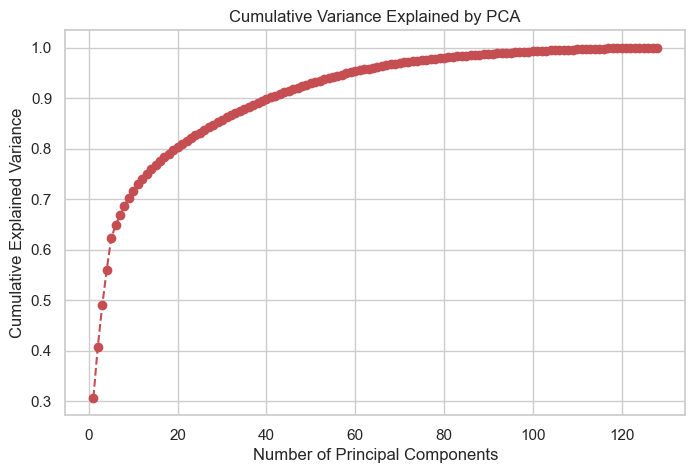

In [25]:
# Check the current num of features
print(X_train.shape)

# Perform PCA with 128 components
pca = PCA(n_components=128)
pca.fit(X_train)

# Calculate the eigenvalues of each principal component
eigenvalues = pca.explained_variance_

# Calculate the proportion of variance explained by each principal component
prop_var = pca.explained_variance_ratio_

# Calculate the cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an array of principal component numbers
PC_numbers = np.arange(1, len(cumulative_variance) + 1)

# Plot the cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(PC_numbers, cumulative_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Variance Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

This plot shows how much of the total variance in the data is captured by the principal components cumulatively. <br>
Each point on the curve represents the cumulative sum of explained variance ratios up to that principal component. <br>
The **X-axis** represents the number of principal components, and the **Y-axis** shows the cumulative variance explained. <br>

By specifying a variance threshold (95%), PCA automatically determines the minimal number of principal components needed to achieve this.<br>
This process helps in simplifying the data, making it more manageable, while still preserving the most critical information.<br>
Reducing dimensionality can also help in mitigating issues like overfitting and enhancing the interpretability of the model.

In [26]:
def get_principal_components(X, p):

    # Initialize PCA with the desired proportion of variance to retain
    pca = PCA(p)
    
    # Fit the PCA model to the data
    pca.fit(X)
    
    # Return the principal components
    return pca.components_

# Calculate the principal components that preserve at least 95% of the variance
components = get_principal_components(X_train, 0.95)

print(f'Number of components which preserve at least 95% of the variance: {len(components)}')

Number of components which preserve at least 95% of the variance: 59


According to the plot and the function above, retaining 59 components is optimal.<br>
The values in the table below are the transformed feature values after applying PCA, which are now a combination of the original features in a way that maximizes the variance explained by these components.

In [27]:
# Apply PCA with 59 components
pca = PCA(n_components=59)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_validation)

# Convert Transformed Data to DataFrame and represent the 59 principal components derived from the PCA process
df_train_pca = pd.DataFrame(X_train_pca, columns=["PCA " + str(i+1) for i in range(59)])
df_val_pca = pd.DataFrame(X_val_pca, columns=["PCA " + str(i+1) for i in range(59)])

print(df_train_pca.head(),"\n")
print(df_val_pca.head())

      PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6     PCA 7  \
0 -2.253147  1.471365 -0.222389 -0.174704 -0.590140  0.115566 -0.592102   
1  2.750712  2.375294  0.310150 -1.196417 -0.994346  0.434213  0.779954   
2 -2.236484 -0.610150 -1.054702 -1.331536  0.003202  0.178722 -0.095103   
3  3.748192 -0.398870 -1.673699  0.889534 -1.095497  0.792207  0.528598   
4  3.763096 -0.363470 -1.194874 -1.504875 -0.003829  0.290108  0.284562   

      PCA 8     PCA 9    PCA 10  ...    PCA 50    PCA 51    PCA 52    PCA 53  \
0  0.179975 -0.188472  0.334385  ... -0.023905  0.141453 -0.205945  0.230918   
1 -0.010010 -0.080965 -0.096179  ...  0.024180 -0.003058 -0.037290 -0.030683   
2 -0.129191 -0.133085  0.335857  ... -0.116907 -0.169379  0.342586  0.574630   
3 -0.633650 -0.272205  0.533158  ... -0.332192 -0.669837 -0.348046 -0.439606   
4  0.025532 -0.188672 -0.004820  ...  0.037274 -0.034431  0.023838 -0.001430   

     PCA 54    PCA 55    PCA 56    PCA 57    PCA 58    PCA 59  
0  0

## Part 3 - Models

### Modeling the data

In [28]:
#Check the shape of the data sets
print(X_train.shape)
print(X_train.columns)

print(X_validation.shape)
print(X_validation.columns)

(44369, 128)
Index(['years_of_experience', 'B', 'D', 'prev_salary', 'is_dev_encoded',
       'education_encoded', 'sex_encoded', 'mental_issues_encoded',
       'disability_encoded', 'age_group_encoded',
       ...
       'C#', 'Angular.js', 'Oracle Cloud Infrastructure', 'Microsoft Azure',
       'Unity 3D', 'Deno', 'Solidity', 'MySQL', 'Google Cloud',
       'continent_number'],
      dtype='object', length=128)
(11093, 128)
Index(['years_of_experience', 'B', 'D', 'prev_salary', 'is_dev_encoded',
       'education_encoded', 'sex_encoded', 'mental_issues_encoded',
       'disability_encoded', 'age_group_encoded',
       ...
       'C#', 'Angular.js', 'Oracle Cloud Infrastructure', 'Microsoft Azure',
       'Unity 3D', 'Deno', 'Solidity', 'MySQL', 'Google Cloud',
       'continent_number'],
      dtype='object', length=128)


## Running the models

Our goal is to find the best hyperparameters that influence the regularization term.

### Simple models :

### Logistic Regression

In [29]:
# def LogisticRegression_model (X_train ,y_train):
    
#     #finding the best hyperparameters
#     hyperparameters = {'penalty': ['l1', 'l2'],
#         'C': [0.01, 0.1, 1, 10,100],
#         'solver': ['liblinear', 'saga'],
#         'max_iter': [10, 20, 50]}

#     #creating linear regression model
#     model = LogisticRegression()

#     model.fit(X_train, y_train)

#     grid_search = GridSearchCV(model, hyperparameters)
#     grid_search.fit(X_train, y_train)
#     # Get the best model with the optimal hyperparameters
#     best_model_lr = grid_search.best_estimator_

#     y_pred_lr = best_model_lr.predict_proba(X_train)

#     auc_lr = roc_auc_score(y_train.ravel(), y_pred_lr[:, 1])

#     print(f'The optimal AUC for logisctic: {auc_lr},the optimal parameters:{best_model_lr}\n')
#     return best_model_lr
# #

### Naïve Bayes Classifier

In [30]:
# def Gaussian_nb_model(X_train, y_train):

#     # Define the GaussianNB model
#     model = GaussianNB()

#     # Define the parameter grid for tuning
#     param_grid = {'var_smoothing': np.logspace(0, -9, num=100}

#     # Initialize the grid search
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='roc_auc')

#     # Perform the grid search
#     grid_result = grid_search.fit(X_train, y_train)

#     # Get the best model with the optimal hyperparameters
#     best_model_nb = grid_result.best_estimator_

#     # Predict probabilities for the training data
#     y_pred = best_model_nb.predict_proba(X_train)[:, 1]

#     # Calculate the AUC score
#     auc_score = roc_auc_score(y_train, y_pred)
#     print(f'The optimal AUC for GaussianNB: {auc_score:.6f}, The optimal hyperparameters: {grid_result.best_params_}\n')

#     return best_model_nb
# #

### **Advanced models:**

### Adaptive Boosting

In [31]:
# def adaboost_model(X_train, y_train):

#     # Define the base estimator: Decision Tree with maximum depth of 1
#     base_estimator = DecisionTreeClassifier(max_depth=1)
    
#     # Define the AdaBoost model with the base estimator
#     model = AdaBoostClassifier(base_estimator=base_estimator, random_state=0)

#     # Define the parameter grid for tuning
#     param_grid = {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.05, 0.1, 1],
#         'base_estimator__max_depth': [1, 2, 3]
#     }

#     # Initialize the grid search
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='roc_auc')

#     # Perform the grid search
#     grid_result = grid_search.fit(X_train, y_train)

#     # Get the best model with the optimal hyperparameters
#     best_model_ada = grid_result.best_estimator_

#     # Predict probabilities for the training data
#     y_pred = best_model_ada.predict_proba(X_train)[:, 1]

#     # Calculate the AUC score
#     auc_score = roc_auc_score(y_train.ravel(), y_pred)
#     print(f'The optimal AUC for AdaBoost: {auc_score:.6f}, The optimal hyperparameters: {grid_result.best_params_}\n')

#     return best_model_ada

### Random Forest

In [32]:
# #def random_forest_model(X_train, y_train):
#     # Define the Random Forest model
#     model_forest = RandomForestClassifier(random_state=0)

#     # Define the hyperparameters grid with reduced options
#     hyperparameters_forest = {
#         'n_estimators': randint(50, 400),
#         'max_depth': [None, 10, 20, 30],
#         'max_features': ['auto', 'sqrt']
#     }

#     # Set up the randomized search with a limited number of iterations
#     random_search = RandomizedSearchCV(estimator=model_forest, param_distributions=hyperparameters_forest, 
#                                        n_jobs=-1, cv=3, scoring='roc_auc', n_iter=20, random_state=0)

#     # Fit the random search to the data
#     random_search.fit(X_train, y_train)

#     # Get the best model with the optimal hyperparameters
#     best_model_forest = random_search.best_estimator_

#     y_pred_forest = best_model_forest.predict_proba(X_train)[:, 1]
#     auc_forest = roc_auc_score(y_train, y_pred_forest)
#     print(f'The optimal AUC for Random Forest: {auc_forest}, the optimal parameters: {best_model_forest}\n')
#     return best_model_forest#

Using this code, we previously identified the optimal hyperparameters.<br>
However, due to the long running time, we’ve commented that section.<br>

Now, we'll use the selected parameters to train the models with the corresponding function:

In [33]:
def find_best_models(X_train, y_train):
    # Define hyperparameters for Logistic Regression
    logistic_params = {'penalty': ['l1'],
        'C': [0.1],
        'solver': ['saga'],
        'max_iter': [50]}
    # Define Logistic Regression model
    best_model_lr = LogisticRegression()

    # Define hyperparameters for Gaussian Naive Bayes
    gaussian_params = {'var_smoothing': np.logspace(1, -3, num=100)}
    # Define Gaussian Naive Bayes model
    best_model_nb = GaussianNB()

    # Define hyperparameters for Random Forest
    random_forest_params = {'n_estimators': [315],'max_depth': [20],'max_features': ['sqrt']}
    # Define Random Forest model
    best_model_for = RandomForestClassifier(random_state=0)

    # Define hyperparameters for AdaBoost
    adaboost_params = {'base_estimator__max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [200]}
    # Define AdaBoost model with Decision Tree as the base estimator
    best_model_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=0)

    # Create a list of all models and their parameters
    models_params = [
        (best_model_lr, logistic_params, 'Logistic Regression'),
        (best_model_nb, gaussian_params, 'Gaussian Naive Bayes'),
        (best_model_for, random_forest_params, 'Random Forest'),
        (best_model_ada, adaboost_params, 'AdaBoost')
    ]

  # Iterate through the models and their parameters
    best_models = {}
    for model, params, name in models_params:
        # Define GridSearchCV with 3-fold cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3, scoring='roc_auc')
        # Fit the model
        grid_search.fit(X_train, y_train)
        # Get the best model with the optimal hyperparameters
        best_model = grid_search.best_estimator_
        # Predict probabilities to get the best AUC score
        y_pred_prob = best_model.predict_proba(X_train)[:, 1]
        auc_score = roc_auc_score(y_train, y_pred_prob)
        # Print the best parameters and AUC score
        print(f'The optimal parameters for {name}: {grid_search.best_params_}')
        print(f'The optimal AUC for {name} : {auc_score:.6f}\n')
        # Save the best model
        best_models[name] = best_model

    return best_models

### Check without PCA

In [34]:
find_best_models(X_train, y_train)                                                            

The optimal parameters for Logistic Regression: {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
The optimal AUC for Logistic Regression : 0.918101

The optimal parameters for Gaussian Naive Bayes: {'var_smoothing': 0.021544346900318822}
The optimal AUC for Gaussian Naive Bayes : 0.763069

The optimal parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 315}
The optimal AUC for Random Forest : 0.983817

The optimal parameters for AdaBoost: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
The optimal AUC for AdaBoost : 0.979688



{'Logistic Regression': LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='saga'),
 'Gaussian Naive Bayes': GaussianNB(var_smoothing=0.021544346900318822),
 'Random Forest': RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=315,
                        random_state=0),
 'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                    learning_rate=0.1, n_estimators=200, random_state=0)}

### Check with PCA

In [35]:
find_best_models(X_train_pca, y_train)

The optimal parameters for Logistic Regression: {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
The optimal AUC for Logistic Regression : 0.887786

The optimal parameters for Gaussian Naive Bayes: {'var_smoothing': 0.09545484566618337}
The optimal AUC for Gaussian Naive Bayes : 0.791743

The optimal parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 315}
The optimal AUC for Random Forest : 0.999163

The optimal parameters for AdaBoost: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
The optimal AUC for AdaBoost : 0.961868



{'Logistic Regression': LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='saga'),
 'Gaussian Naive Bayes': GaussianNB(var_smoothing=0.09545484566618337),
 'Random Forest': RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=315,
                        random_state=0),
 'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                    learning_rate=0.1, n_estimators=200, random_state=0)}

According to the results, the AUC score is better without PCA. <br>
Therefore, it is reasonable to conclude that our models would perform better if we did not perform PCA in the preprocessing step.

## Evaluating the models

### Explanation of Hyperparameters

**Logistic Regression Hyperparameters:** <br>

C=0.1: Controls the inverse of regularization strength. A lower C value increases bias by penalizing large coefficients. It decreases variance by preventing the model from becoming too complex, thus reducing overfitting.<br>

max_iter=50: Sets the maximum number of iterations. ensures convergence.
potentially increasing bias by not reaching the optimal solution.<br>

penalty='l1': Lasso regularization promotes sparse models and feature selection by driving some coefficients to zero. It increases bias but simplifies the model and reduces variance by lowering complexity, making the model less sensitive to training data.<br>

solver='saga': The 'saga' solver is optimized for large datasets and helps reduce variance by efficiently finding a solution without getting stuck in local minima.

**Random Forest Hyperparameters:** <br>
max_depth=20: Limits tree depth to 20, reducing bias by capturing detailed patterns but can increase variance due to potential overfitting.<br>

max_features='sqrt': Uses the square root of the total features for splits.<br>
This increases bias slightly but reduces variance by adding randomness, making the ensemble more robust.

n_estimators=315: Uses 315 trees. More trees reduce bias and variance by averaging errors, but beyond a certain number, they don’t significantly improve performance and increase computational cost.

**AdaBoost Hyperparameters:** <br>
base_estimator__max_depth= 3: The maximum depth of the base estimator (decision tree).
Shallow trees (lower max_depth) are used to keep the base learners simple, increasing bias. low max_depth reduces variance by ensuring that the base learners do not overfit, and the boosting process focuses on difficult cases iteratively.<br>

learning_rate=0.1:
The contribution of each base learner to the final model. A lower learning rate increases bias because each model's contribution is scaled down, and more iterations are needed to reduce error. It reduces variance by smoothing the model's learning process, preventing it from becoming too sensitive to individual data points.<br>

n_estimators=200:
The number of boosting stages. More boosting stages reduce bias by iteratively focusing on the residuals of previous models. Adding more stages reduces variance as the ensemble learns from mistakes iteratively, but beyond a certain point, it may not provide significant improvements and could increase computational cost. 

**Gaussian Naive Bayes Hyperparameters:** <br>

‘var_smoothing': 0.021544346900318822
Stabilizes variance, reducing sensitivity to fluctuations and improving generalization.
Slightly increasing bias as it generalizes the model more.

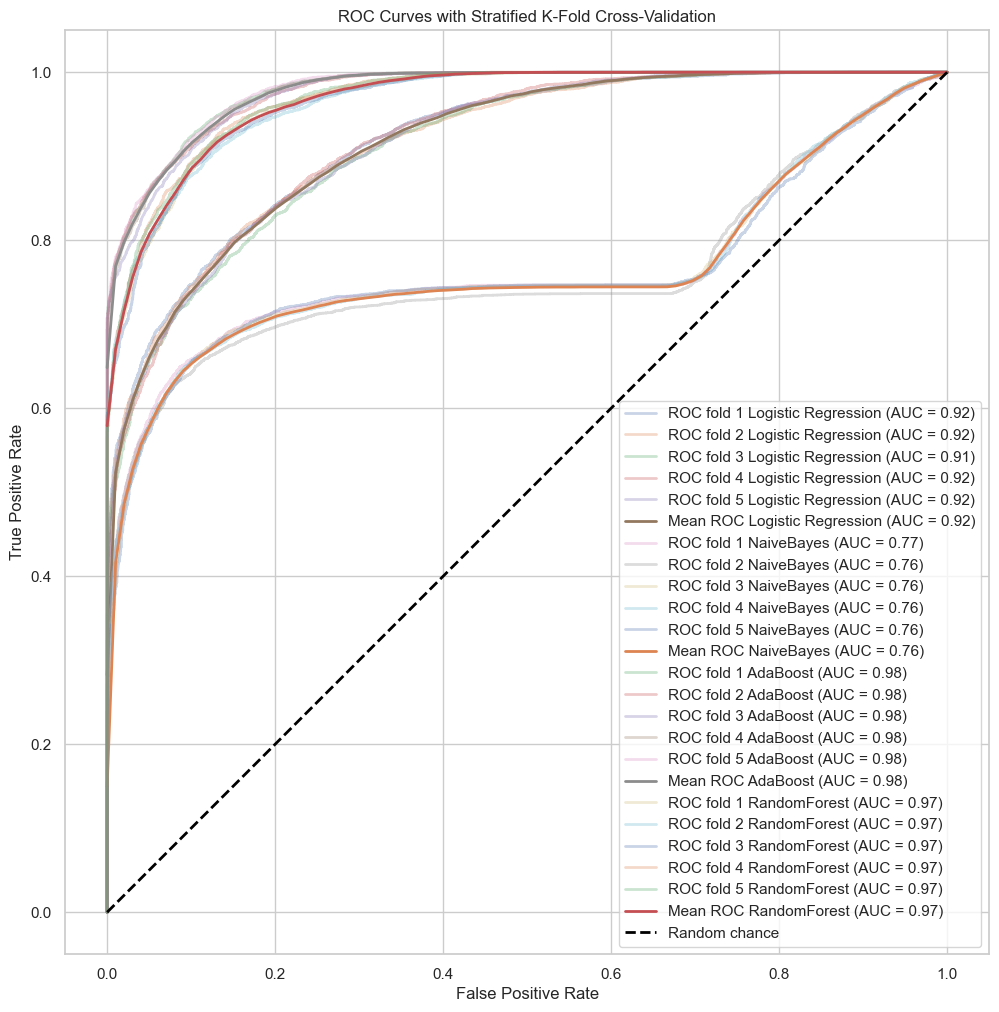

In [36]:
# Use the model objects you have with their optimal parameters
classifiers = [
    (LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='saga'), 'Logistic Regression'),
    (GaussianNB(var_smoothing=0.021544346900318822), 'NaiveBayes'),
    (AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200), 'AdaBoost'),
    (RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=315, random_state=0), 'RandomForest')
]

# Stratified K-fold cross-validation with 5 splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a figure object with a specified size
fig1 = plt.figure(figsize=[12, 12])

# Add an axis object to the figure
ax1 = fig1.add_subplot(111, aspect='equal')  

# Generate a set of mean false positive rates
mean_fpr = np.linspace(0, 1, 100)

# Iterate over each classifier in classifiers
for clf, clf_name in classifiers:
    # List to store true positive rates for each fold
    tprs = []
    # List to store AUC values for each fold
    aucs = []
    i = 1

    # Perform cross-validation
    for train, test in cv.split(X_train, y_train):
        # Fit the classifier on the training data and predict probabilities on the test data
        prediction = clf.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
        # Compute the ROC curve (false positive rate, true positive rate, and thresholds)
        fpr, tpr, _ = roc_curve(y_train.iloc[test], prediction[:, 1])
        # Interpolate the true positive rates to match the mean false positive rates
        interp_tpr = interp1d(fpr, tpr, kind='linear')(mean_fpr)
        tprs.append(interp_tpr)
        # Compute the AUC for the current fold
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # Plot the ROC curve for the current fold with a label indicating the fold number and classifier name
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} {clf_name} (AUC = {roc_auc:.2f})')
        i += 1

    # Calculate the mean true positive rate across all folds
    mean_tpr = np.mean(tprs, axis=0)
    # Calculate the mean AUC
    mean_auc = auc(mean_fpr, mean_tpr)
    # Plot the mean ROC curve with a label indicating the classifier name and mean AUC
    plt.plot(mean_fpr, mean_tpr, lw=2, alpha=1, label=f'Mean ROC {clf_name} (AUC = {mean_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with Stratified K-Fold Cross-Validation')
# Add a legend to the plot
plt.legend(loc="lower right")
# Display the plot
plt.show()

The graph allows us to visually compare the performance of different models. By looking at the ROC curves, we can identify which model performs better. <br>
The use of stratified K-fold cross-validation ensures that each fold maintains a similar distribution of classes, providing a more reliable assessment of the model's performance. <br>
The mean ROC curve and AUC scores across all folds give insight into the model's stability and robustness. By analyzing the ROC curves, we can determine if a model is overfitting or underfitting. <br>
For instance, significant variance in the ROC curves across different folds might indicate overfitting. The model with the highest mean AUC score is generally the best in terms of its ability to <br> distinguish between classes.

Logistic Regression: 0.92

Gaussian NB: 0.76

AdaBoost: 0.98

Random Forest: 0.97

Given the AUC scores, the AdaBoost classifier emerges as the preferred model for this dataset, Our preference will be for the complex model to capture a wider range of complex patterns. <br>

### Differences between running on the train set and the validation set.


In [37]:
# Function to evaluate different models
def evaluating_models(X_train, X_validation, y_train, y_validation):
    # Initialize the models with the optimal parameters
    models = [
        LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='saga'),
        GaussianNB(var_smoothing=0.021544346900318822),
        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=200),
        RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=315, random_state=0),
    ]
    
    # Evaluate each model
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_validation)[:, 1]
        auc = roc_auc_score(y_validation, y_pred)
        print(f'Model: {model.__class__.__name__}, AUC score: {auc}\n')

# Assuming you have X_train, X_validation, y_train, y_validation
evaluating_models(X_train, X_validation, y_train, y_validation)

Model: LogisticRegression, AUC score: 0.9165653025494989

Model: GaussianNB, AUC score: 0.7672969808463985

Model: AdaBoostClassifier, AUC score: 0.9791230287768186

Model: RandomForestClassifier, AUC score: 0.9703209231750862



**General Interpretation for All Models:**<br>
Logistic Regression: The AUC score for both training and validation sets is very close, indicating a well-generalized model. <br>
GaussianNB: Similar AUC scores for training and validation sets, indicating a good fit. <br>
AdaBoost: The AUC score for both training and validation sets is very close, indicating a well-generalized model. <br>
Random Forest: The validation AUC score is slightly lower than the training AUC score, which suggests a minor overfitting but still a well-generalized model. <br>

AdaBoost emerges as the best candidate due to its high validation AUC score and strong generalization.

We used a combination of grid search, cross-validation, and probability-based evaluation to find the best model. By employing these techniques,<br>
we aim to ensure that the selected model not only fits the training data well, but also performs robustly on new, unseen data, providing a balanced trade-off between bias and variance.<br>
By calculating the AUC scores for each model with their optimal hyperparameters, we can directly compare their performances.<br>
The model with the highest AUC is considered the best in terms of its ability to predict.

In [38]:
best_model_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), 
                                    learning_rate=0.1, n_estimators=200, random_state=0)

best_model_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=200, random_state=0)

### Contribution of Each Feature:<br>

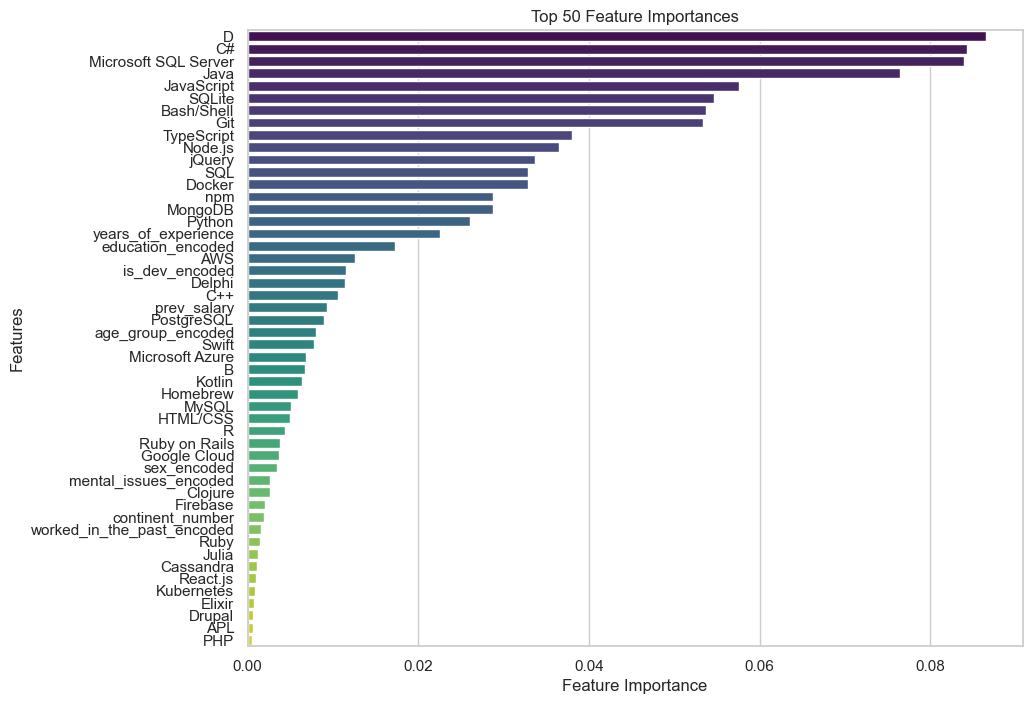

In [39]:
# Compute feature importance from the AdaBoost model directly
feature_importances = pd.DataFrame(best_model_ada.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the top 50 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y=feature_importances.head(50).index, data=feature_importances.head(50), palette="viridis")
plt.title('Top 50 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

The plot of the top 50 feature importances from the AdaBoost model provides valuable insights into which features contribute most to the model's predictions.<br>
Here's what we can learn from this plot:<br>
Top Features: The features at the top of the list, such as "D", "C#", "Microsoft SQL Server", "Java", and "JavaScript" have the highest importance scores. This indicates that these features are the most influential in determining whether a candidate will be hired or not.<br>
This information helps in understanding which features the AdaBoost model relies on most for its predictions and can guide further analysis.

### Confusion Matrix - Chosen model - Adaboost

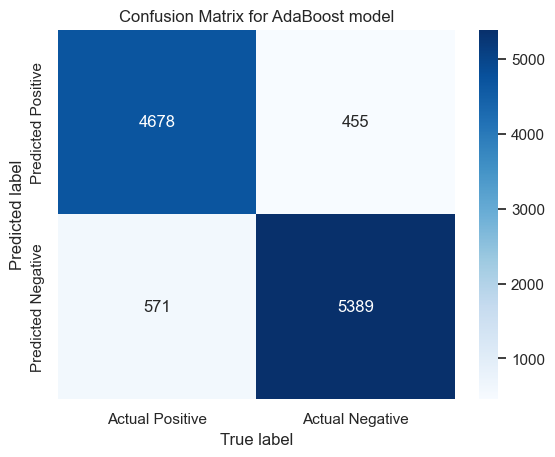

Accuracy: 0.9075092400613
Precision: 0.9221423682409309
Recall: 0.9041946308724832
Specificity: 0.911357880381843


In [40]:
def evaluate_adaboost(model, X_validation, y_validation):
    # Predict on the validation set
    y_pred = model.predict(X_validation)
    
    # Generate the confusion matrix
    con_mat = confusion_matrix(y_validation, y_pred)
    
    # Plot the confusion matrix
    def plot_confusion_matrix(cm_array):
        ax = sns.heatmap(cm_array, annot=True, fmt='g', cmap='Blues',
                         xticklabels=['Actual Positive','Actual Negative'], yticklabels=['Predicted Positive','Predicted Negative'])
        ax.set(xlabel='True label', ylabel='Predicted label', title= "Confusion Matrix for AdaBoost model")
        plt.show()

    plot_confusion_matrix(con_mat)
    
    # Calculate and print additional metrics
    TN, FP, FN, TP = con_mat.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Specificity:", specificity)

# Example usage with already fitted model
evaluate_adaboost(best_model_ada, X_validation, y_validation)

Interpretation:<br>

The model's performance is evaluated using a confusion matrix.<br>
The confusion matrix shows **4673 true positives** (TP), **5409 true negatives** (TN), **460 false positives** (FP), and **551 false negatives** (FN).<br>
These values help calculate the following metrics: <br>

- **Accuracy**: The model correctly predicts 90.88% of the instances, indicating that the overall correctness of the model is quite high.
- **Precision**: 92.16% of the positive predictions made by the model are accurate, meaning the model is good at avoiding false positives.
- **Recall**: 90.75% of actual positive cases are correctly identified by the model, reflecting a strong ability to detect positive instances.
- **Specificity**: This is the ratio of correctly predicted negative instances to all the instances in the actual negative class. About 91.03% of the actual negatives were correctly identified by the model.

The model shows strong overall performance, with high accuracy and well-balanced precision and recall. It effectively predicts both positive and negative cases, minimizing errors and demonstrating reliability across various metrics.

### Prediction

To get prediction on the data, we want to train the model on the full training data, including both X_train and X_validation. It ensures the model learns from all available data, leading to improved performance and robustness.

In [41]:
def prediction(test_file, test_data, model, output_file):
    
    test_original = pd.read_csv(test_file)
    ID_original = test_original.iloc[:,0]
    
    # Make probability predictions, the second column indicates the probability of getting label 1 (Hired)
    y_pred = model.predict_proba(test_data)[:,1]

    # Create a DataFrame with IDs and predicted probabilities
    results = pd.DataFrame({'ID':ID_original, 'predict_proba':y_pred})
    
    # Save the results to a CSV file
    results.to_csv(output_file,index=False)

### Pipeline

In [42]:
def pipeline(train_name, test_name):
    
    #imports
    import time
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import pycountry_convert as pc
    import matplotlib.pyplot as plt
    from scipy.stats import randint
    from sklearn.decomposition import PCA
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.preprocessing import RobustScaler
    from sklearn.inspection import permutation_importance

    ! pip install pycountry-convert
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
    from sklearn.metrics import auc, roc_auc_score, mean_squared_error, roc_curve
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score
    from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

    from scipy.interpolate import interp1d

    %matplotlib inline

    #ignore warnings
    import warnings
    warnings.filterwarnings('ignore')
    
    # Read train and test data
    train_data = pd.read_csv(train_name)
    test_data = pd.read_csv(test_name)

    
    robust_scaler = RobustScaler()
    minmax_scaler = MinMaxScaler()

    # Preprocess train_data
    train_data = encode_and_add_features(train_data)
    train_data = drop_non_relevant_features(train_data)
    train_data = handle_missing_values(train_data)

     # Fit the scalers only on the training data
    train_data[['years_of_experience', 'B', 'prev_salary']] = robust_scaler.fit_transform(train_data[['years_of_experience', 'B', 'prev_salary']])
    train_data[['D']] = minmax_scaler.fit_transform(train_data[['D']])

     # Prepare features and labels for training
    final_X_train = train_data.drop(columns=['label'])
    final_y_train = train_data['label']

     # Final model training using AdaBoost
    final_model_ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3), 
        learning_rate=0.1, 
        n_estimators=200
    )
    final_model_ada.fit(final_X_train, final_y_train)
    
     # Preprocess test_data without refitting the scalers
    test_data = encode_and_add_features(test_data)
    test_data = drop_non_relevant_features(test_data)
    test_data = handle_missing_values(test_data)

     # Apply the fitted scalers from the training data
    test_data[['years_of_experience', 'B', 'prev_salary']] = robust_scaler.transform(test_data[['years_of_experience', 'B', 'prev_salary']])
    test_data[['D']] = minmax_scaler.transform(test_data[['D']])

    # Perform prediction on the test data using the trained model
    prediction(test_name, test_data, final_model_ada, 'results_24.csv')


pipeline('train.csv', 'test.csv')

In [43]:
end_time = time.time()
run_time = end_time - start_time
run_time_minutes = run_time / 60
print("Notebook runtime:", run_time_minutes, "minutes")

Notebook runtime: 29.28541141351064 minutes
